# FINAL PROJECT
### Customer Churn Analysis
Customer churn refers to the number of customers who stop using a company's services over a given period of time. It is an important metric because retaining existing customers is often less costly than acquiring new ones. High churn rates potetially signal dissatisfaction with many of the company's offerings, leading to a negative impact on revenue and growth. The overall goal for analyzing churn is to identify at-risk customers early and take action to improve customer experience.

This project will analyze the Telco Customer Churn dataset (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) for potenital churn patterns, and attempt to predict the most at-risk customers.

In [103]:
! pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# EDA

### All Features 
- <b>Churn</b>: Customer churned? (Yes/No)
- <b>CustomerID</b>: Customer’s Unique ID
- <b>gender</b>: Customer’s gender (Male/Female)
- <b>SeniorCitizen</b>: Whether customer is a senior citizen (1=Yes, 0=No)
- <b>Partner</b>: Whether customer has a partner (Yes/No).
- <b>Dependents</b>: Whether customer has dependents (Yes/No).
- <b>tenure</b>: Number of months person was customer
- <b>PhoneService</b>: Does customer have phone service (Yes/No).
- <b>MultipleLines</b>: Whether customer has multiple lines (Yes, No, No phone service).
- <b>InternetService</b>: Type of internet service (DSL, Fiber optic, None).
- <b>Contract</b>: Contract type (Month-to-month, One year, Two year).
- <b>PaperlessBilling</b>: Billing is paperless? (Yes/No).
- <b>PaymentMethod</b>: Payment method (Electronic check, mailed check, ...).
- <b>MonthlyCharges</b>: Monthly amount charged to customer.
- <b>TotalCharges</b>: Total amount charged.
- <b>TechSupport</b>, <b>StreamingTV</b>, <b>StreamingMovies</b>, <b>OnlineSecurity</b>, <b>OnlineBackup</b>, <b>DeviceProtection</b>: Optional services
(Yes/No/No internet service).


<b>Numerical Features</b>: 'tenure', 'MonthlyCharges', 'TotalCharges'<br>
<b>Categorical Features</b>: 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService' 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod'<br>
<b>Target</b>: 'Churn'


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# save to dataframe and confirm you get data back
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.info())
#print(df.head())
#print(df.describe())

# check for duplicated rows
print(f"Duplicated rows: {df.duplicated().sum()}")

# recognize monthly charges and total charges should be same data type
# attempting to convert df['TotalCharges'] to type float reveals there are 11 empty strings (" ") in column 'TotalCharges'
# coerce errors and replace NaN with median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Number of rows with a blank space: {df['TotalCharges'].isna().sum()}")
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f"Number of rows with a blank space: {df['TotalCharges'].isna().sum()}")





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Visualize Features

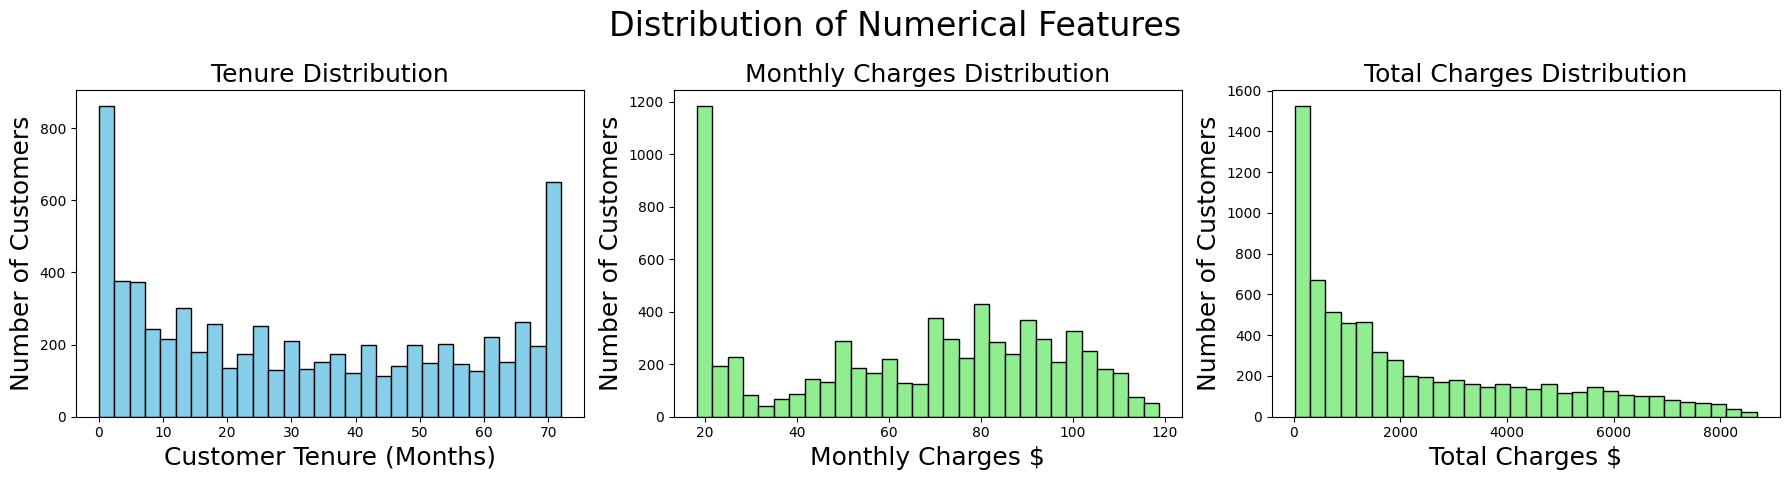

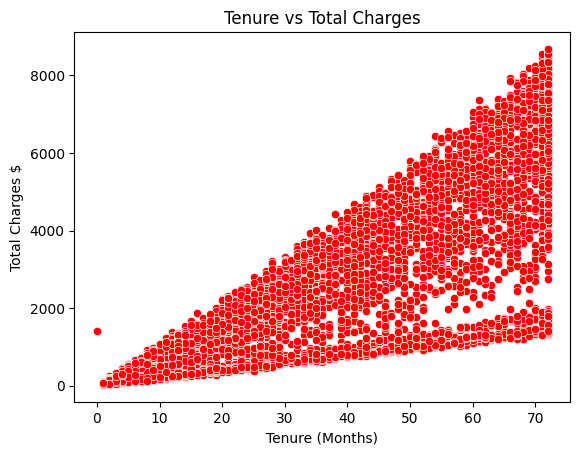

In [111]:

# Visualize numerical features
fig, ps = plt.subplots(1, 3, figsize=(18,5))

ps[0].hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')
ps[0].set_title('Tenure Distribution', fontsize=18)
ps[0].set_xlabel('Customer Tenure (Months)', fontsize=18)
ps[0].set_ylabel('Number of Customers', fontsize=18)

ps[1].hist(df['MonthlyCharges'], bins=30, color='lightgreen', edgecolor='black')
ps[1].set_title('Monthly Charges Distribution', fontsize=18)
ps[1].set_xlabel('Monthly Charges $', fontsize=18)
ps[1].set_ylabel('Number of Customers', fontsize=18)

ps[2].hist(df['TotalCharges'], bins=30, color='lightgreen', edgecolor='black')
ps[2].set_title('Total Charges Distribution', fontsize=18)
ps[2].set_xlabel('Total Charges $', fontsize=18)
ps[2].set_ylabel('Number of Customers', fontsize=18)
fig.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

# shows an outlier, one big spender
sns.scatterplot(x='tenure', y='TotalCharges', color='red', data=df)
plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges $')
plt.show()





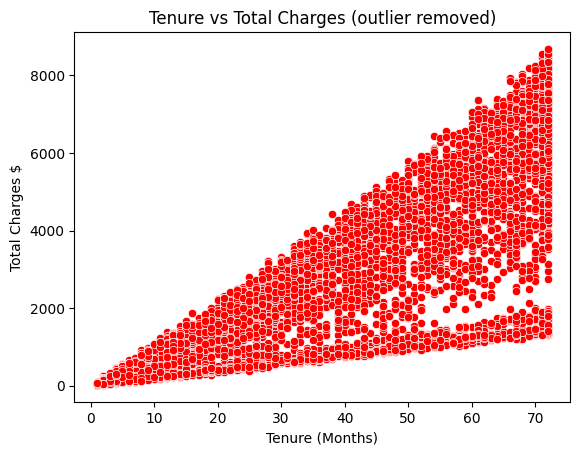

In [112]:
# clear the outlier
outlier = df[(df['tenure'] == 0) & (df['TotalCharges'] > 1000)]
df = df.drop(index=outlier.index)
sns.scatterplot(x='tenure', y='TotalCharges', color='red', data=df)
plt.title('Tenure vs Total Charges (outlier removed)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges $')
plt.show()


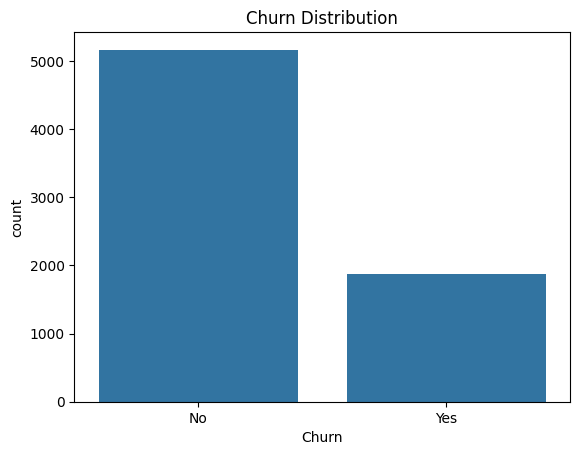

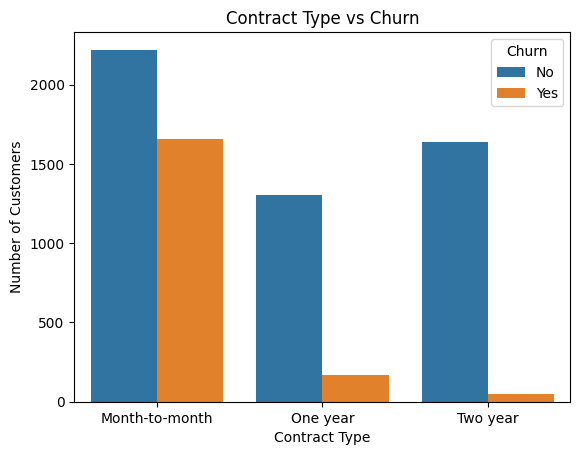

In [113]:
# Visualize Categorical Features
# target 
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()
# anaylze smaller vs longer  financial commitments 
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()
